# Jupyter Notebook

TODO: Remove this: Notebooks are great for interactive exploration and presentation. You can run code AND present your work with headings and narrative text. In analytics, we typically use **Python** for code and **Markdown** for this title block, section headings, and text.

TODO: Modify this title block to show your company/name/alias and a link to the project repo.

- Author: [Elom Gbogbo](https://github.com/egbogbo11/)
- Repository: [capstone-insurance-costs-predictor](https://github.com/egbogbo11/capstone-insurance-costs-predictor)

## Section 1. Introduction

TODO: Remove this and customize your intro: Introduce the purpose of your project and provide background information on data sources, etc. 
The purpose of this notebook is to introduce notebooks for analytics. 
This is a Markdown cell (not a Python cell). 
Here are a few tips to help you get started with Jupyter Notebooks:

- To run a cell, press **Ctrl Enter** (or **Cmd Enter** on Mac) when you're done editing the cell.
- You can change the type of a cell (e.g., code or markdown) by looking in the lower left corner of the notebook interface.
- You can rearrange cells by dragging and dropping them within the notebook.
- After creating a new notebook, use **File > Save as** to rename and save it into your repository folder.
- To select a kernel (Python environment) for your notebook in Visual Studio Code, click on the **Select Kernel** name in the top-right corner of the notebook interface and choose the desired kernel from the dropdown menu. Follow suggestions to install recommended extensions. Once installed, click Select Kernel / Python Environments and choose the Recommended local project `.venv` created earlier. This will create a new kernel for the notebook and allow code to use the packages installed in the virtual environment.

## Section 2. Imports

TODO: Remove this: This is a Markdown cell. It introduces the initial code setup to run the notebook. In the code cell below, enter your import statements and any initial configuration required.

In [3]:
# This is a Python cell. Imports go at the top.

import pandas as pd
import numpy as np
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import seaborn as sns  # built in chart styles, built on matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [8]:
import os

# 1. Check your current working directory
print("Current directory:", os.getcwd())

# 2. List everything in current directory
print("\nFiles in current directory:")
print(os.listdir())

# 3. Check if 'data' folder exists
if 'data' in os.listdir():
    print("\n✓ 'data' folder found!")
    print("Files in 'data' folder:")
    print(os.listdir('data'))
else:
    print("\n✗ 'data' folder NOT found in current directory")

Current directory: c:\Repos\capstone-insurance-costs-predictor\notebooks

Files in current directory:
['demo_notebook.ipynb']

✗ 'data' folder NOT found in current directory


## Load and Inspect the Data

In [13]:
# Load the dataset
df = pd.read_csv('../data/insurance.csv')

# Verify successful loading
print(df.shape)  # (1338, 7)
print(df.info())  # Check data types and missing values

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


## Section 3. Data Description

TODO: Remove this: This is a Markdown cell. Describe your data source, count of rows, each attribute / feature / column.

TODO: Remove this and provide your data description below.  
This analysis uses the built-in `penguins` dataset from the Seaborn package.  
It is a clean, well-structured dataset collected by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER program. The data describe physical measurements for penguins from three species observed on three islands in the Palmer Archipelago, Antarctica.

The dataset includes approximately **344 rows** (individual penguins) and **7 columns** (attributes):

| Column | Type | Description | Values/Range |
|---------|------|-------------|--------------|
| `age` | numeric (int) | Age of the primary insurance beneficiary in years. | 18-64 years |
| `sex` | categorical | Gender of the insurance contractor (*male* or *female*). | male, female |
| `bmi` | numeric (float) | Body Mass Index, calculated as weight in kg / (height in m)². Provides understanding of body weight relative to height. | 15.96-53.13 |
| `children` | numeric (int) | Number of dependents (children) covered by the insurance plan. | 0-5 |
| `smoker` | categorical | Smoking status of the beneficiary (*yes* or *no*). | yes, no |
| `region` | categorical | Geographic region of beneficiary's residence in the US (*northeast*, *northwest*, *southeast*, or *southwest*). | northeast, northwest, southeast, southwest |
| `charges` | numeric (float) | Individual medical costs billed by health insurance in US dollars. **This is the target variable.** | $1,121.87-$63,770.43 |

### Notes
- Some rows include **missing values** for `sex` and certain measurements; these should be handled before statistical analysis.  
- A mix of **categorical** and **numeric** features makes this dataset useful for practicing data visualization, descriptive statistics, and basic analytics techniques.


In [14]:
# Check for missing values
print(df.isnull().sum())

# Display summary statistics
df.info()
display(df.describe())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Section 4. Analysis and Visualization

TODO: Remove this: This is a Markdown cell. 

TODO: Introduce your analysis and visualization processes in clear, organized sections. Most will use more than one section for this part - adjust your headings accordingly. 

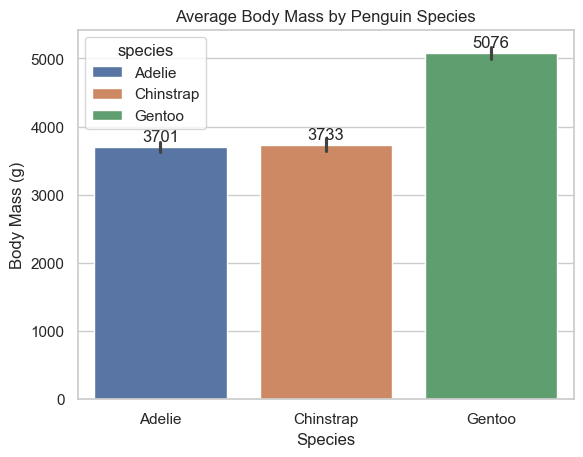

In [15]:
# This is a Python cell

# 1. Load a built-in dataset (many are available: 'penguins', 'tips', 'iris', 'flights', etc.)
df = sns.load_dataset("penguins")

# 2. Pick a built-in Seaborn theme for style
sns.set_theme(style="whitegrid")

# 3. Use Seaborn to create a bar chart, returns a set of axes
ax: Axes = sns.barplot(
    data=df,  # set chart data to our dataframe
    x="species",  # set chart x-axis to species column
    y="body_mass_g",  # set chart y-axis to body mass column
    hue="species",  # color by species
    palette="deep",  # choose a color palette (many built-in options available)
    legend="full",  # show full legend with all categories
)

# 4. Add numeric labels above each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=2)  # type: ignore

# 5. Add titles and labels
plt.title("Average Body Mass by Penguin Species")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.show()

## Section 5. Results and Conclusions

TODO: Remove this: This is a Markdown cell. At the end of your notebook, summarize practical insights gained from your analysis. Be specific, data-driven, and present what useful insights (based on specific results) your analysis has shown. Summarize for the reader so they don't have to review the entire analysis, but they can.

TODO: Summarize your specific results and conclusions clearly.
From the chart, we can see that Adelie and Chinstrap penguins have very similar average body mass, while the Gentoo penguins are noticeably heavier.  
On average, Gentoo penguins weigh roughly **20% more** than the other two species.  


## Before Committing: Finalize and Run All before sending to GitHub

TODO: Remove this whole cell or confirm that you have reviewed your notebook for quality. This is a Markdown cell. Before committing a notebook, use 'Run All' to generate all outputs and display them in the notebook. Verify everything looks right before using git add-commit-push to save your work to GitHub. Confirm title block and intro are good, section headings are clear, visuals have clear captions, labels, axes, units, and legends. Professional analysis skills and professional communication skills are critical. 
